In [ ]:
!pip install -U git+https://github.com/nltk/nltk.git@model
!pip install javalang

In [34]:
import os
import glob
from tqdm import tqdm_notebook
import javalang
from nltk.model.ngram import LidstoneNgramModel
from nltk.model.counter import NgramModelVocabulary
from nltk.model.counter import NgramCounter
import matplotlib.pyplot as plt
import random

In [2]:
GLOBAL_TIME = '2016-12-01'
path = 'elasticsearch/'

In [3]:
cmd = 'cd {path}; git checkout `git rev-list -n 1 --before="{time}" master`'.format(
        path=path, 
        time=str(GLOBAL_TIME))
os.system(cmd)


0

In [7]:
class RepoLanguageModel:
    
    def __init__(self,path):        
        self.path = path
        self.corpus = []
        
    def get_all_repo_files(self):
        
        files = []
        for filename in glob.iglob(self.path + '**/*.java', recursive=True):
            files.append(filename)
        return files
        
    def create_corpus(self, files):
        
        parsed_files = []
        
        print('Bad files: ')
        for filename in tqdm_notebook(files):
            with open(filename, 'r') as file:
                text = file.read()            
                stoptrans = str.maketrans('', '', '#\'`\\"')
                try:
                    parsed_files.append([t.value for t in javalang.tokenizer.tokenize(text.translate(stoptrans))])
                except:
                    print(filename)
                    
        corpus = []
        for file in tqdm_notebook(parsed_files):
            line = []
            for i in range(len(file)):
                if file[i] != ';':
                    line.append(file[i])
                else:
                    corpus.append(line)
                    line = []
        self.corpus = [s for s in corpus if len(s) > 0 and s[0]!= '*']
        self.vocabulary = NgramModelVocabulary(1, [j for i in corpus for j in i])
        return 
    

In [18]:
rlm = RepoLanguageModel(path)

rlm.create_corpus(rlm.get_all_repo_files())

Bad files: 


HBox(children=(IntProgress(value=0, max=5023), HTML(value='')))

elasticsearch/core/src/test/java/org/elasticsearch/index/analysis/CJKFilterFactoryTests.java
elasticsearch/core/src/test/java/org/elasticsearch/index/analysis/CharMatcherTests.java
elasticsearch/core/src/test/java/org/elasticsearch/common/network/InetAddressesTests.java
elasticsearch/core/src/test/java/org/elasticsearch/search/suggest/SuggestSearchIT.java
elasticsearch/core/src/main/java/org/elasticsearch/index/translog/TranslogReader.java
elasticsearch/modules/ingest-common/src/test/java/org/elasticsearch/ingest/common/GrokTests.java
elasticsearch/plugins/analysis-kuromoji/src/test/java/org/elasticsearch/index/analysis/KuromojiAnalysisTests.java
elasticsearch/plugins/analysis-icu/src/test/java/org/elasticsearch/index/analysis/SimpleIcuNormalizerCharFilterTests.java



HBox(children=(IntProgress(value=0, max=5015), HTML(value='')))

In [21]:
rlm.ngrams = NgramCounter(5, rlm.vocabulary)
rlm.ngrams.train_counts(rlm.corpus)

In [22]:
model = LidstoneNgramModel(0.9, rlm.ngrams)

In [23]:
stoptrans = str.maketrans('', '', '#\'`\\"')

In [24]:
GLOBAL_DELETED_parsed = []
with open('GLOBAL_DELETED_' + GLOBAL_TIME) as file:
    for d in file.readlines():
        d = d.strip('\n')
        try:
            GLOBAL_DELETED_parsed.append([t.value for t in javalang.tokenizer.tokenize(d.translate(stoptrans))])
        except:
            pass
print('GLOBAL_DELETED_parsed:', len(GLOBAL_DELETED_parsed))

GLOBAL_DELETED_parsed: 15561


In [25]:
GLOBAL_ADDED_parsed = []
with open('GLOBAL_ADDED_' + GLOBAL_TIME) as file:
    for d in file.readlines():
        d = d.strip('\n')
        try:
            GLOBAL_ADDED_parsed.append([t.value for t in javalang.tokenizer.tokenize(d.translate(stoptrans))])
        except:
            pass
print('GLOBAL_ADDED_parsed:', len(GLOBAL_ADDED_parsed))

GLOBAL_ADDED_parsed: 55811


In [26]:
entropy_deleted = [model.entropy(line) for line in GLOBAL_DELETED_parsed if len(line) > 0 and line[0] != '*']
entropy_added = [model.entropy(line) for line in GLOBAL_ADDED_parsed  if len(line) > 0 and line[0] != '*']

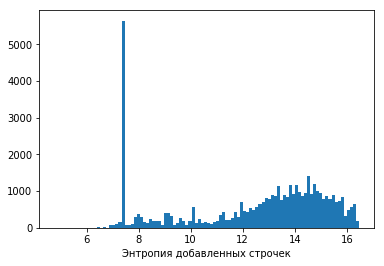

In [35]:
obj = plt.hist(entropy_added, bins = 100)
plt.xlabel('Энтропия добавленных строчек')
#plt.savefig('entropy_added.png', dpi=400)
plt.show()

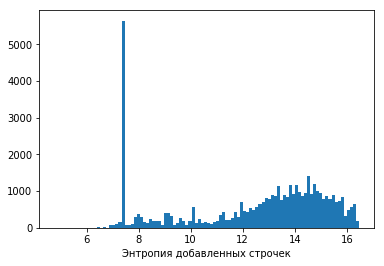

In [36]:
obj = plt.hist(entropy_added, bins = 100)
plt.xlabel('Энтропия добавленных строчек')
#plt.savefig('entropy_added.png', dpi=400)
plt.show()

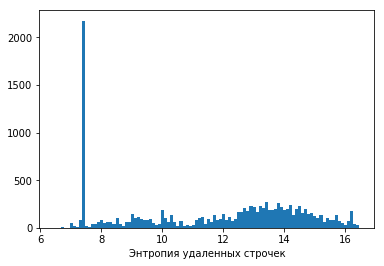

In [37]:
obj = plt.hist(entropy_deleted, bins = 100)
plt.xlabel('Энтропия удаленных строчек')
#plt.savefig('entropy_deleted.png', dpi=400)
plt.show()

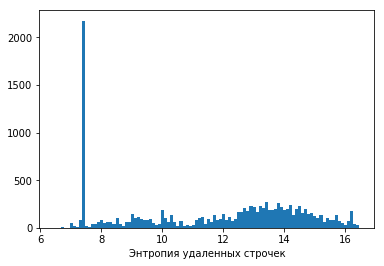

In [38]:
obj = plt.hist(entropy_deleted, bins = 100)
plt.xlabel('Энтропия удаленных строчек')
#plt.savefig('entropy_deleted.png', dpi=400)
plt.show()

In [39]:
sample_from_corpus = random.sample(rlm.corpus, 50000)
entropy_all = [model.entropy(line) for line in sample_from_corpus if len(line) > 0 and line[0] != '*']

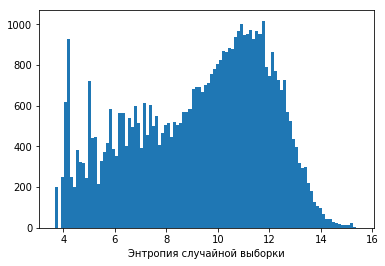

In [40]:
obj = plt.hist(entropy_all, bins = 100)
plt.xlabel('Энтропия случайной выборки')
#plt.savefig('entropy_random_sample.png', dpi=400)
plt.show()

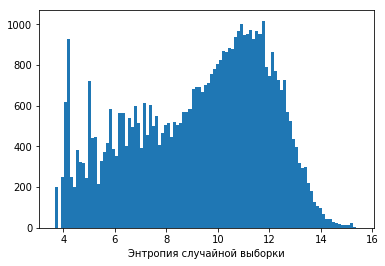

In [41]:
obj = plt.hist(entropy_all, bins = 100)
plt.xlabel('Энтропия случайной выборки')
#plt.savefig('entropy_random_sample.png', dpi=400)
plt.show()